<a href="https://colab.research.google.com/github/mingun0112/GestureClassification/blob/main/gestureClassification_Loss_0.32.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/hand_gesture_data.zip

Archive:  /content/drive/MyDrive/hand_gesture_data.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

path = '/content/'

train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')
sample_submission = pd.read_csv(path + 'sample_submission.csv')
train.head()

,id,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,target
0,1,-6.149463,-0.929714,9.058368,-7.017854,-2.958471,0.179233,-0.956591,-0.972401,5.956213,...,-7.026436,-6.006282,-6.005836,7.043084,21.884650,-3.064152,-5.247552,-6.026107,-11.990822,1
1,2,-2.238836,-1.003511,5.098079,-10.880357,-0.804562,-2.992123,26.972724,-8.900861,-5.968298,...,-1.996714,-7.933806,-3.136773,8.774211,10.944759,9.858186,-0.969241,-3.935553,-15.892421,1
2,3,19.087934,-2.092514,0.946750,-21.831788,9.119235,17.853587,-21.069954,-15.933212,-9.016039,...,-6.889685,54.052330,-6.109238,12.154595,6.095989,-40.195088,-3.958124,-8.079537,-5.160090,0
3,4,-2.211629,-1.930904,21.888406,-3.067560,-0.240634,2.985056,-29.073369,0.200774,-1.043742,...,-2.126170,-1.035526,2.178769,10.032723,-1.010897,-3.912848,-2.980338,-12.983597,-3.001077,1
4,5,3.953852,2.964892,-36.044802,0.899838,26.930210,11.004409,-21.962423,-11.950189,-20.933785,...,-2.051761,10.917567,1.905335,-13.004707,17.169552,2.105194,3.967986,11.861657,-27.088846,2


In [4]:
print(train.shape)
print(test.shape)

(2335, 34)
(9343, 33)


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         2335 non-null   int64  
 1   sensor_1   2335 non-null   float64
 2   sensor_2   2335 non-null   float64
 3   sensor_3   2335 non-null   float64
 4   sensor_4   2335 non-null   float64
 5   sensor_5   2335 non-null   float64
 6   sensor_6   2335 non-null   float64
 7   sensor_7   2335 non-null   float64
 8   sensor_8   2335 non-null   float64
 9   sensor_9   2335 non-null   float64
 10  sensor_10  2335 non-null   float64
 11  sensor_11  2335 non-null   float64
 12  sensor_12  2335 non-null   float64
 13  sensor_13  2335 non-null   float64
 14  sensor_14  2335 non-null   float64
 15  sensor_15  2335 non-null   float64
 16  sensor_16  2335 non-null   float64
 17  sensor_17  2335 non-null   float64
 18  sensor_18  2335 non-null   float64
 19  sensor_19  2335 non-null   float64
 20  sensor_2

In [6]:
train['target'].value_counts()

3    599
2    593
1    574
0    569
Name: target, dtype: int64

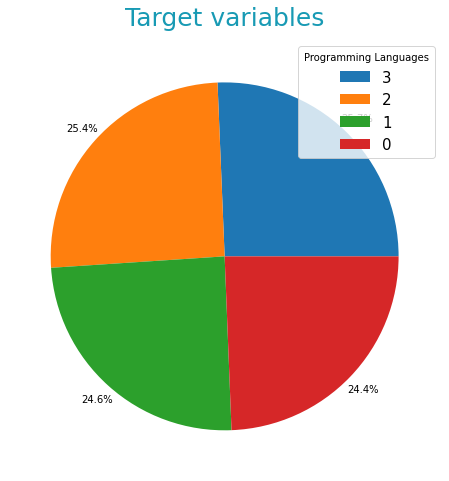

In [7]:
plt.figure(figsize=[12,8]) #시각화 자료 사이즈
plt.text(s="Target variables",x=0,y=1.3, va='bottom',ha='center',color='#189AB4',fontsize=25)#시각화 자료 텍스트 
plt.pie(train['target'].value_counts(),autopct='%1.1f%%', pctdistance=1.1)#히스토그램
plt.legend(['3', '2', '1', '0'], loc = "upper right",title="Programming Languages", prop={'size': 15})#라벨
plt.show()

In [8]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2335.0,1168.000000,674.200761,1.000000,584.500000,1168.000000,1751.500000,2335.000000
sensor_1,2335.0,-1.122174,11.486353,-94.746969,-4.036597,-0.951398,2.895540,68.876142
sensor_2,2335.0,-1.024673,7.399859,-63.942094,-4.031957,-1.015582,2.140456,39.913391
sensor_3,2335.0,-0.672769,26.519159,-122.195138,-14.878500,-0.961088,13.974075,127.124171
sensor_4,2335.0,-0.147724,15.551500,-111.870691,-7.116633,-0.890469,6.110973,102.015561
sensor_5,2335.0,-0.327494,11.461970,-94.147972,-3.968687,-0.871690,2.970387,89.059852
sensor_6,2335.0,-0.423462,7.314322,-70.916786,-3.957699,-0.804810,3.006144,34.923040
sensor_7,2335.0,0.676275,26.869479,-105.956553,-13.937806,0.058910,13.934438,120.046277
sensor_8,2335.0,-0.936019,15.598104,-102.965354,-8.053214,-1.095551,4.955494,125.160611
sensor_9,2335.0,-0.797432,12.015022,-81.268085,-4.031148,-0.944613,2.235557,74.101715


In [9]:
train_x = train.drop(['id', 'target'], axis = 1)
test_x = test.drop(['id'], axis = 1)

mins = train_x.min()
maxs = train_x.max()
mins[:5]

sensor_1    -94.746969
sensor_2    -63.942094
sensor_3   -122.195138
sensor_4   -111.870691
sensor_5    -94.147972
dtype: float64

In [10]:
train_x = (train_x - mins) / (maxs - mins)
test_x = (test_x - mins) / (maxs - mins)
train_x.describe().T[['min', 'max']]

,min,max
sensor_1,0.0,1.0
sensor_2,0.0,1.0
sensor_3,0.0,1.0
sensor_4,0.0,1.0
sensor_5,0.0,1.0
sensor_6,0.0,1.0
sensor_7,0.0,1.0
sensor_8,0.0,1.0
sensor_9,0.0,1.0
sensor_10,0.0,1.0


In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


import random
random.seed(42)
torch.manual_seed(42)

In [12]:
train_x = torch.from_numpy(train_x.to_numpy()).float()
train_y = torch.tensor(train['target'].to_numpy(), dtype = torch.int64)

test_x = torch.from_numpy(test_x.to_numpy()).float()

train_x

tensor([[0.5415, 0.6067, 0.5264,  ..., 0.6256, 0.4657, 0.4889],
        [0.5654, 0.6060, 0.5106,  ..., 0.6646, 0.4742, 0.4719],
        [0.6957, 0.5955, 0.4939,  ..., 0.6374, 0.4574, 0.5188],
        ...,
        [0.5240, 0.6733, 0.4574,  ..., 0.5721, 0.4617, 0.5373],
        [0.5547, 0.6447, 0.4422,  ..., 0.6371, 0.5505, 0.4885],
        [0.5678, 0.5481, 0.3061,  ..., 0.6840, 0.4012, 0.4843]])

In [13]:
train_dataset = TensorDataset(train_x, train_y)

print(train_dataset.__len__())
print(train_dataset.__getitem__(1))

2335
(tensor([0.5654, 0.6060, 0.5106, 0.4722, 0.5095, 0.6418, 0.5882, 0.4123, 0.4846,
        0.4620, 0.4892, 0.4825, 0.5209, 0.6385, 0.3529, 0.5038, 0.5435, 0.6448,
        0.5070, 0.4935, 0.5120, 0.5833, 0.5024, 0.4934, 0.5799, 0.5716, 0.5003,
        0.5383, 0.6573, 0.6646, 0.4742, 0.4719]), tensor(1))


In [14]:
train_dataloader = DataLoader(train_dataset, batch_size = 16, shuffle = True)

for batch_idx, samples in enumerate(train_dataloader):
    if batch_idx > 0:
        break
    print(samples[0].shape)
    print(samples[1])

torch.Size([16, 32])
tensor([1, 3, 1, 1, 1, 2, 1, 0, 3, 0, 3, 0, 3, 2, 2, 0])


In [15]:
class Models(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(32, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, 4),
        )

    def forward(self, x):
        x = self.linear_relu_stack(x)
        return x

model = Models()

print(model)

Models(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=32, out_features=64, bias=True)
    (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=64, out_features=128, bias=True)
    (5): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.2, inplace=False)
    (8): Linear(in_features=128, out_features=256, bias=True)
    (9): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Dropout(p=0.2, inplace=False)
    (12): Linear(in_features=256, out_features=4, bias=True)
  )
)


In [16]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(1000):
    
    running_loss = 0.0
    accuracy = 0
    for i, data in enumerate(train_dataloader, 0):
        inputs, labels = data

        optimizer.zero_grad() # 매개변수를 0으로 만듭니다. 매 학습시 초기화해줘야합니다.
        outputs = model(inputs) # 입력값을 넣어 순전파를 진행시킵니다.

        loss = criterion(outputs, labels) # 모델 출력값와 실제값을 손실함수에 대입합니다.
        loss.backward() # 손실함수에서 역전파 수행합니다.
        optimizer.step() # 옵티마이저를 사용해 매개변수를 최적화합니다.

        running_loss += loss.item()

        _, predictions = torch.max(outputs, 1)

        for label, prediction in zip(labels, predictions):
            if label == prediction:
                accuracy = accuracy + 1

    
    print(f'{epoch + 1} 에포크 loss: {running_loss / i:.3f}')
    print(f'{epoch + 1} 에포크 정확도: {accuracy / (i * 16):.3f}')

1 에포크 loss: 1.295
1 에포크 정확도: 0.393
2 에포크 loss: 1.136
2 에포크 정확도: 0.502
3 에포크 loss: 1.039
3 에포크 정확도: 0.581
4 에포크 loss: 0.977
4 에포크 정확도: 0.599
5 에포크 loss: 0.932
5 에포크 정확도: 0.634
6 에포크 loss: 0.900
6 에포크 정확도: 0.639
7 에포크 loss: 0.875
7 에포크 정확도: 0.651
8 에포크 loss: 0.847
8 에포크 정확도: 0.664
9 에포크 loss: 0.813
9 에포크 정확도: 0.678
10 에포크 loss: 0.780
10 에포크 정확도: 0.692
11 에포크 loss: 0.806
11 에포크 정확도: 0.687
12 에포크 loss: 0.766
12 에포크 정확도: 0.711
13 에포크 loss: 0.757
13 에포크 정확도: 0.709
14 에포크 loss: 0.735
14 에포크 정확도: 0.713
15 에포크 loss: 0.741
15 에포크 정확도: 0.708
16 에포크 loss: 0.730
16 에포크 정확도: 0.728
17 에포크 loss: 0.729
17 에포크 정확도: 0.720
18 에포크 loss: 0.693
18 에포크 정확도: 0.730
19 에포크 loss: 0.691
19 에포크 정확도: 0.724
20 에포크 loss: 0.697
20 에포크 정확도: 0.740
21 에포크 loss: 0.680
21 에포크 정확도: 0.741
22 에포크 loss: 0.676
22 에포크 정확도: 0.740
23 에포크 loss: 0.670
23 에포크 정확도: 0.747
24 에포크 loss: 0.680
24 에포크 정확도: 0.734
25 에포크 loss: 0.641
25 에포크 정확도: 0.750
26 에포크 loss: 0.668
26 에포크 정확도: 0.746
27 에포크 loss: 0.649
27 에포크 정확도: 0.758
28 에포크 loss: 0.635


In [17]:
model.eval() # 모델을 평가모드로 바꿉니다. dropout이 일어나지 않습니다.

with torch.no_grad(): # 이 안의 코드는 가중치 업데이트가 일어나지 않습니다.
    outputs = model(test_x)
    _, pred = torch.max(outputs, 1)

pred

tensor([0, 0, 1,  ..., 2, 0, 3])

In [18]:
sample_submission['target'] = pred.numpy()
sample_submission['target'].value_counts()

1    3203
2    2332
0    1917
3    1891
Name: target, dtype: int64

In [19]:
sample_submission.to_csv('result_submission.csv',index=False)